# Introduction

**Making sure you can run PyTorch code**

In our first practical session, we will learn the basics of how to train, test and use simple multilayered perceptron networks.

But first we need to verify that we are able to run pyTorch code. you can execute the code blocks as the one below by clicking shift+Enter


In [6]:
if 'google.colab' in str(get_ipython()):
  print('Running in Google colab, no need to install libraries')
else:
  print('Download the requirements.txt file from the course Web site in order to automatically install required libraries on a local machine via pip')

Download the requirements.txt file from the course Web site in order to automatically install required libraries on a local machine via pip


If you ran the above code snippet, you should see that you are either in google colab, or in some other environment.

In [7]:
import torch

print(f'pytorch version: {torch.__version__}')

num_gpu = torch.cuda.device_count()
print(f'{num_gpu} GPU available')

pytorch version: 2.1.2
0 GPU available


If the above code has printed 0 GPU available, please make sure you switched to the T4 GPU capable runtime (top right corner of the page), or else, the exercises will be very slow...

Once you are running a runtime with GPU, you can also run a shell command nvidia-smi, to check on the status of your GPU

In [8]:
!nvidia-smi


fish: Unknown command: nvidia-smi
fish: 
nvidia-smi
^


#Example 1 - Simple linear regression task

Now that everything is up a running, let us check one of the simplest tasks, a neural network can perform - a linear regression. I.e. we will generate some data that will correspond to an approximate linear function and we will try to train a model that realizes this function.

First, let us generate some data.

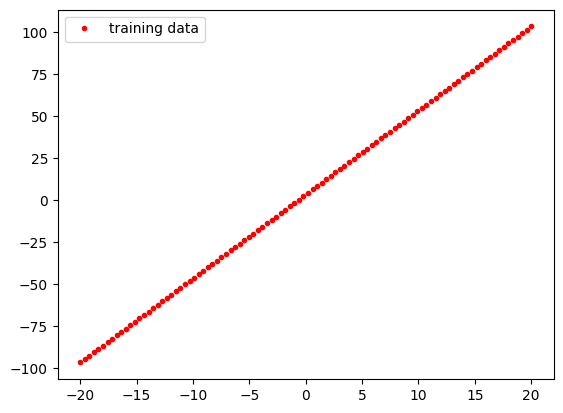

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Xs = np.linspace(-20,20,100) # we start with a hundered X values between -20 and 20

Ys=Xs*5+3.5 # as our Xs are a numpy array, we can perform simple arithmetic on each element of Xs

#Now, we can plot the data we generated

plt.plot(Xs,Ys,"r.",label="training data")
plt.legend()

Now we need to define the model. We will go with a very simple network, with one input, one output, and a hidden layer with 4 neurons.



In [10]:

import torch.nn as nn

#we set the parameters of our simple network architecture
N_input=1
N_hidden=4
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((100,1)), dtype=torch.float32)


Now that we have the data and the model, we need to specify the optimizer and a loss function. As this is a regression task, we will use the MSE (MeanSquareError) loss function and a simple SGD(stochastic gradient descent optimizer).

In [11]:
criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) # lr is the learning rate


Finally, we need to set up the main training loop.

In [12]:
N_epochs=3000
loss_vals=[]
# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 100 == 0:
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  3408.21630859375
epoch:  100  loss:  16.942066192626953
epoch:  200  loss:  13.0333251953125
epoch:  300  loss:  10.043076515197754
epoch:  400  loss:  7.73394775390625
epoch:  500  loss:  5.942779541015625
epoch:  600  loss:  4.551915168762207
epoch:  700  loss:  3.4733426570892334
epoch:  800  loss:  2.6394033432006836
epoch:  900  loss:  1.9971795082092285
epoch:  1000  loss:  1.5048751831054688
epoch:  1100  loss:  1.1293333768844604
epoch:  1200  loss:  0.8442614674568176
epoch:  1300  loss:  0.6289007067680359
epoch:  1400  loss:  0.46695032715797424
epoch:  1500  loss:  0.34568172693252563
epoch:  1600  loss:  0.2552284896373749
epoch:  1700  loss:  0.18799448013305664
epoch:  1800  loss:  0.13818436861038208
epoch:  1900  loss:  0.101385697722435
epoch:  2000  loss:  0.07426455616950989
epoch:  2100  loss:  0.054323162883520126
epoch:  2200  loss:  0.039688337594270706
epoch:  2300  loss:  0.02896445244550705
epoch:  2400  loss:  0.0211191363632679
epoch:  250

After training, we can also plot the evolution of the loss function value over the training period

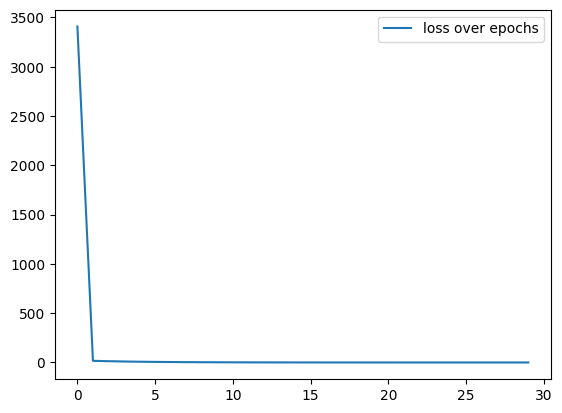

In [13]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()

As we can see, the first step is the most helpful, but actually, there is more happening than meets the eye in this plot, we just need to explore it in more detail by changing the y-axis range

(-0.5, 15.0)

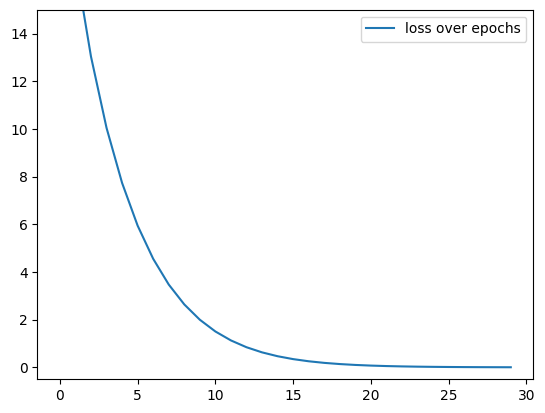

In [14]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()
plt.ylim(-.5,15)


Now that we have trained our model, we can see how it can be used on some new testing data. We will generate a few points inside the interval that the network was trained on and a few samples outside, to see if the network generalizes.

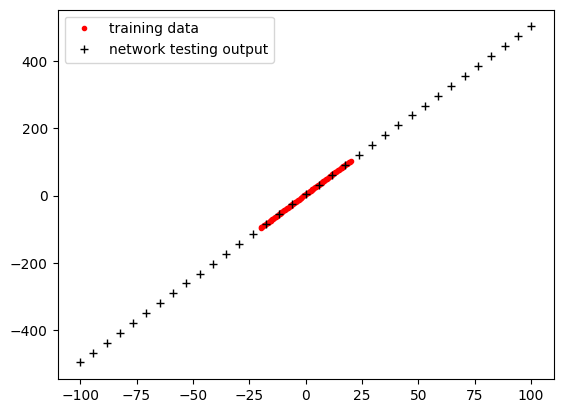

In [15]:
test_Xs= np.linspace(-100,100,35)
test_Ys=test_Xs*5+3.5

with torch.no_grad(): # turning off the autograd of PyTorch
    test_data = torch.tensor(test_Xs.reshape((35,1)), dtype=torch.float32)
    test_output = model(test_data)

#plot the results
plt.plot(Xs,Ys,"r.",label="training data")
plt.plot(test_Xs,test_output,"k+",label="network testing output")
plt.legend()

As we can see, the model is generalizing properly from the training data we have provided it with.


# Example 2 - non-linear function of 2 arguments

Now that we have the first working neural network model, we can move to something a little more realistic. A non-linear function of two arguments. Let's try with:

Y = x2 ** 2 * 5 - x1 * 3 + 15

torch.Size([2500, 2])

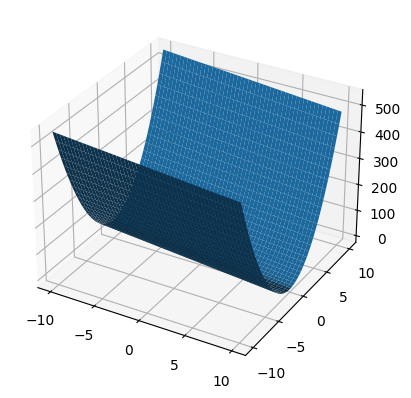

In [16]:
Xs1 = np.linspace(-10,10,50)
Xs2 = np.linspace(-10,10,50)

Xs1,Xs2 = np.meshgrid(Xs1,Xs2) # generate all possible pairs of x1 and x2

Ys = (Xs2**2*5)-(Xs1*3) + 15

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys, vmin=Ys.min() * 2)

#preparing torch tensors for learning

inputs = torch.tensor(np.concatenate((Xs1.reshape((2500,1)),Xs2.reshape((2500,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((2500,1)), dtype=torch.float32)

inputs.shape
#targets.shape

This function is non-linear and has multiple arguments, let us create a model with non-linear activation function (We'll use ReLU for that), two hidden layers instead of one and we will use Adam optimizer to speed up the process.

In [17]:
#model definition
N_input=2
N_hidden=25
N_output=1

#we will now have more hidden layers and more neurons in each of them

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),                       # we need non-linear activation functions
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
    nn.ReLU()
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Again, a very similar training loop, with just a bit more iterations:

In [18]:

N_epochs=50000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 2000 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  59835.94140625
epoch:  2000  loss:  11.72514820098877
epoch:  4000  loss:  2.662153959274292
epoch:  6000  loss:  2.111077308654785
epoch:  8000  loss:  1.9792213439941406
epoch:  10000  loss:  2.451317071914673
epoch:  12000  loss:  1.8947802782058716
epoch:  14000  loss:  1.8739783763885498
epoch:  16000  loss:  1.8558270931243896
epoch:  18000  loss:  1.925917625427246
epoch:  20000  loss:  1.849825143814087
epoch:  22000  loss:  1.8943800926208496
epoch:  24000  loss:  1.817685604095459
epoch:  26000  loss:  2.090219259262085
epoch:  28000  loss:  1.8855684995651245
epoch:  30000  loss:  1.8866358995437622
epoch:  32000  loss:  1.794569730758667
epoch:  34000  loss:  1.7919843196868896
epoch:  36000  loss:  1.8105511665344238
epoch:  38000  loss:  1.788774013519287
epoch:  40000  loss:  2.0002479553222656
epoch:  42000  loss:  1.836379885673523
epoch:  44000  loss:  1.9398328065872192
epoch:  46000  loss:  1.8346576690673828
epoch:  48000  loss:  1.862257242202758

The optimizer learns very fast the first few steps and then slows down. Again we can plot the loss function improvement over *time*

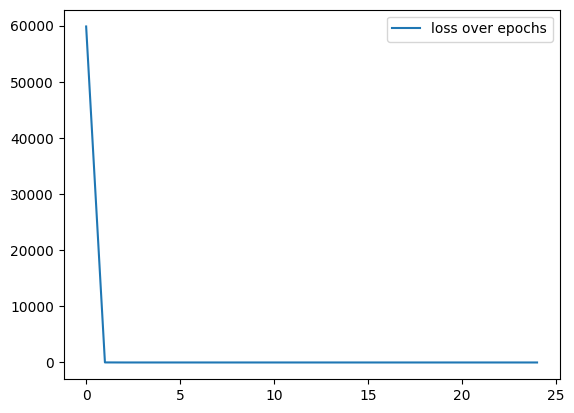

In [19]:
    plt.plot(range(len(loss_vals)),loss_vals,label="loss over epochs")
    plt.legend()

Again, we need to test if the function we have learned is generalizing beyond the training range:

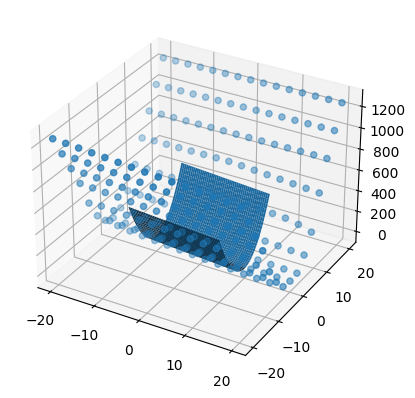

In [20]:
test_Xs1 = np.linspace(-20,20,15)
test_Xs2 = np.linspace(-20,20,15)

test_Xs1,test_Xs2 = np.meshgrid(test_Xs1,test_Xs2)

with torch.no_grad():
    test_data = torch.tensor(np.concatenate((test_Xs1.reshape((225,1)),test_Xs2.reshape((225,1))),axis=1), dtype=torch.float32)
    test_output = model(test_data)

test_mesh_output=test_output.reshape((15,15))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys,label="training data")
ax.scatter(test_Xs1,test_Xs2,test_mesh_output,label="testing data")


We have now seen two examples, where it was relatively easy for pytorch to fit the training data and generalize beyond it in the expected manner. Let us now see some situations, where this might not be so easy.

# Example 3 - XOR-like function


Let us first see how the underfitting looks like, based on the famous example of a non linear function similar to XOR. Let us consider a python function


```
def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
```

Can we train a single perceptron to learn it? This time, we will use some random data points instead of the regular mesh.

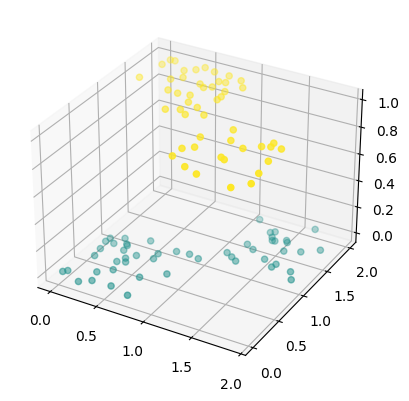

In [21]:
# let us start with some random X1,X2 point pairs from 0,2 interval
N_samples=100
train_X1s=np.random.rand(N_samples)*2
train_X2s=np.random.rand(N_samples)*2

def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
train_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(train_X1s,train_X2s)])

#prepare input and output data
inputs = torch.tensor(np.concatenate((train_X1s.reshape((N_samples,1)),train_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(train_Ys.reshape((N_samples,1)), dtype=torch.float32)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",vmin=-1,c=train_Ys) #data is colored by the Y value


As we have heard in the lecture, this function should be difficult for a simple 1-layer perceptron model. Let us test if this indeed is true. First we need to define the model:

In [22]:

#model definition
N_input=2
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_output),
    nn.ReLU(),                       # we need non-linear activation functions
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Once we have the model, we can try and train it:

In [23]:
N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.49000000953674316
epoch:  500  loss:  0.49000000953674316
epoch:  1000  loss:  0.49000000953674316
epoch:  1500  loss:  0.49000000953674316
epoch:  2000  loss:  0.49000000953674316
epoch:  2500  loss:  0.49000000953674316
epoch:  3000  loss:  0.49000000953674316
epoch:  3500  loss:  0.49000000953674316
epoch:  4000  loss:  0.49000000953674316
epoch:  4500  loss:  0.49000000953674316


The loss function gets lower, but never quite reaches 0. let us see if this is indeed a problem or not.

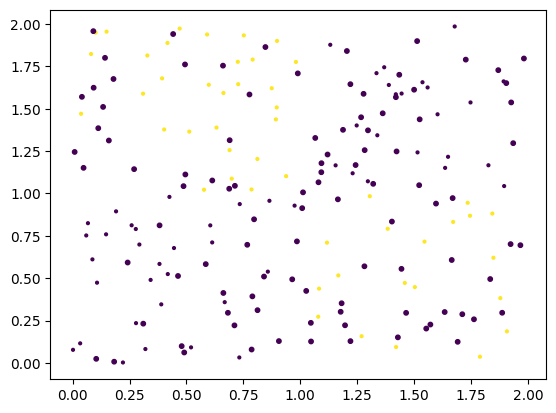

In [24]:
N_samples=100
test_X1s=np.random.rand(N_samples)*2
test_X2s=np.random.rand(N_samples)*2

test_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(test_X1s,test_X2s)])

#prepare test input  data
test_inputs = torch.tensor(np.concatenate((test_X1s.reshape((N_samples,1)),test_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)

with torch.no_grad():
    test_output = model(test_inputs)


# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
# ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")

fig, ax = plt.subplots()
ax.scatter(train_X1s, train_X2s, label="training data",c=train_Ys, s=4)
ax.scatter(test_X1s,test_X2s,label="testing data",c=test_output, s=10)


We can see that the model is definitely not a good fit to the data.

Can we do better?
**Exercise 1**

Can you fill in the missing parts of the code so that we have a two-layer neural network that is able to fit the data?

In [25]:

#model definition
N_input=2
N_hidden=20
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),                       # we need non-linear activation functions
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
    nn.ReLU()
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=15000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()



# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
# ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")


epoch:  0  loss:  0.4172409772872925
epoch:  500  loss:  0.011702848598361015
epoch:  1000  loss:  0.0022614290937781334
epoch:  1500  loss:  0.0008321469067595899
epoch:  2000  loss:  0.00032927619758993387
epoch:  2500  loss:  6.856194522697479e-05
epoch:  3000  loss:  1.6201825928874314e-05
epoch:  3500  loss:  5.0427661335561424e-06
epoch:  4000  loss:  3.01597674479126e-06
epoch:  4500  loss:  0.00011097796232206747
epoch:  5000  loss:  5.2889367907482665e-06
epoch:  5500  loss:  9.27987366594607e-06
epoch:  6000  loss:  6.0071984080423135e-06
epoch:  6500  loss:  1.1115442930531572e-06
epoch:  7000  loss:  3.6566481753652624e-07
epoch:  7500  loss:  6.068898528610589e-06
epoch:  8000  loss:  5.235594926489284e-07
epoch:  8500  loss:  2.1554528828460207e-08
epoch:  9000  loss:  1.0452357868118156e-09
epoch:  9500  loss:  1.1017128320744973e-09
epoch:  10000  loss:  1.5064359482064305e-11
epoch:  10500  loss:  1.3708487131225411e-05
epoch:  11000  loss:  1.0893577595538773e-08
epoc

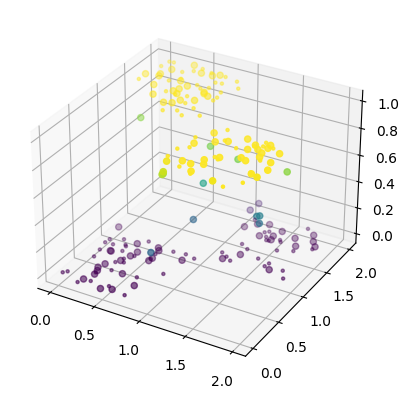

In [26]:
N_samples=100
test_X1s=np.random.rand(N_samples)*2
test_X2s=np.random.rand(N_samples)*2

test_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(test_X1s,test_X2s)])

#prepare test input  data
test_inputs = torch.tensor(np.concatenate((test_X1s.reshape((N_samples,1)),test_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)

with torch.no_grad():
    test_output = model(test_inputs)


# fig, ax = plt.subplots()
# ax.scatter(train_X1s, train_X2s, label="training data",c=train_Ys, s=10)
# ax.scatter(test_X1s,test_X2s,label="testing data",c=test_output, s=10)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")

# Example 4 - Overfitting by undersampling

Let us consider another common issue - overfitting caused by the training set not being representative of the larger testing set.

Let us consider A cosine function:

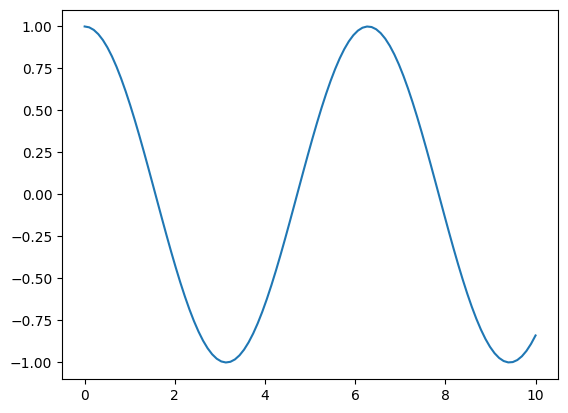

In [27]:
cos_Xs=np.linspace(0,10,100)
cos_Ys=np.cos(cos_Xs)
plt.plot(cos_Xs,cos_Ys)

If we prepare the training data from an interval that is too small, e.g. <0,3>

In [28]:
train_cos_Xs=np.random.rand(100)*3
train_cos_Ys=np.cos(train_cos_Xs)


#we set the parameters of our simple network architecture
N_input=1
N_hidden=15
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((100,1)), dtype=torch.float32)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.39337119460105896
epoch:  500  loss:  0.0013192627811804414
epoch:  1000  loss:  0.0011912513291463256
epoch:  1500  loss:  0.0011151633225381374
epoch:  2000  loss:  0.0006358906393870711
epoch:  2500  loss:  0.000551079458091408
epoch:  3000  loss:  0.00046777224633842707
epoch:  3500  loss:  0.00038831366691738367
epoch:  4000  loss:  0.0003180186031386256
epoch:  4500  loss:  0.00025770190404728055


The training seems to go well, but the function we have learned is notexactly a cosine function...

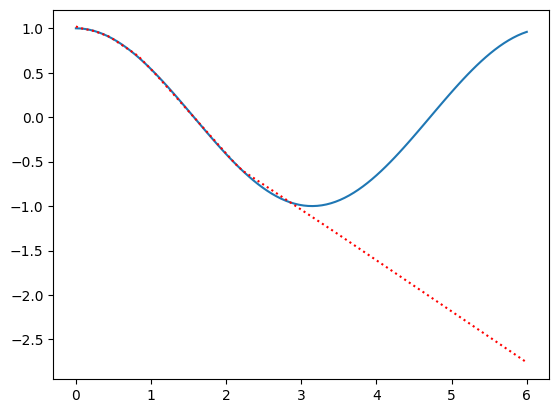

In [29]:
val_cos_Xs=np.linspace(0,6,100)
val_cos_Ys=np.cos(val_cos_Xs)
plt.plot(val_cos_Xs,val_cos_Ys)
val_inputs=torch.tensor(val_cos_Xs.reshape((100,1)), dtype=torch.float32)
with torch.no_grad():
    val_output = model(val_inputs)
plt.plot(val_cos_Xs,val_output,"r:")

Indeed, we have fitted the part of the cosine function from 0 to 3 fairly well, but then the cosine function behaves differently...

This is why we want to use a validation dataset to aid us in seeing the overfitting when it happens. Let us combine the two pieces of code together:


epoch:  0  loss:  0.5315098762512207 validation loss:  0.6163244843482971
epoch:  500  loss:  0.0016383178299292922 validation loss:  2.7099974155426025
epoch:  1000  loss:  0.00019490507838781923 validation loss:  2.799553394317627
epoch:  1500  loss:  0.00014520593686029315 validation loss:  2.7982397079467773
epoch:  2000  loss:  0.00012960912135895342 validation loss:  2.7675607204437256
epoch:  2500  loss:  0.00011422533862059936 validation loss:  2.7220497131347656
epoch:  3000  loss:  9.882705489872023e-05 validation loss:  2.6661176681518555
epoch:  3500  loss:  8.35876417113468e-05 validation loss:  2.6036784648895264
epoch:  4000  loss:  6.937308353371918e-05 validation loss:  2.535006284713745
epoch:  4500  loss:  5.697759479517117e-05 validation loss:  2.4610483646392822


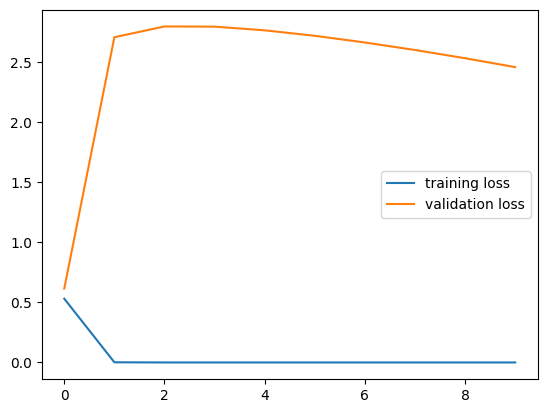

In [37]:
# we create the training data
train_cos_Xs=np.random.rand(200)*3
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

Clearly, while the training error seems to go down with training, but it is not the case for the validation error indicating that we have a severe overfitting issue.

**Exercise 2**

Can you modify the above code snippet, so that the model is fitting the data properly? Hint: we need to make sure that the training data is sampled from the range similar to the validation data...

epoch:  0  loss:  0.5345703959465027 validation loss:  0.5747163891792297
epoch:  500  loss:  0.07462053000926971 validation loss:  0.08483279496431351
epoch:  1000  loss:  0.0051825749687850475 validation loss:  0.005313291680067778
epoch:  1500  loss:  0.0013597042998299003 validation loss:  0.0013972911983728409
epoch:  2000  loss:  0.0004755562113132328 validation loss:  0.0007565005216747522
epoch:  2500  loss:  0.0003643760865088552 validation loss:  0.0007269990746863186
epoch:  3000  loss:  0.00033673341386020184 validation loss:  0.000735136738512665
epoch:  3500  loss:  0.0003214724420104176 validation loss:  0.0007101686205714941
epoch:  4000  loss:  0.000302426575217396 validation loss:  0.0006724015111103654
epoch:  4500  loss:  0.0002780215290840715 validation loss:  0.0006227430421859026


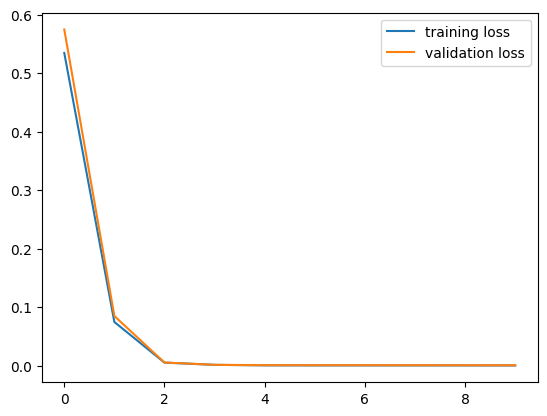

In [39]:
# we create the training data
train_cos_Xs=np.random.rand(200)*6
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

# Example 5 - overfitting noise with large capacity network

Let us consider a relatively simple function: y=x**2-5, but now add a little noise to the samples, and let us assume that the data is expensive to generate, so we will have relatively few datapoints.

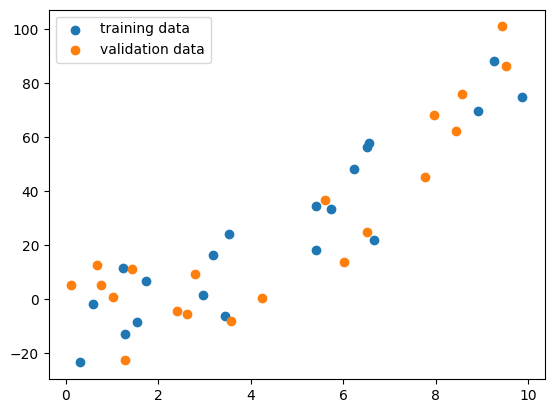

In [41]:
# we create the training data
train_noisy_Xs=np.random.rand(20)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(20)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(20)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(20)*40-20

#plot what is generated

plt.scatter(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.scatter(val_noisy_Xs,val_noisy_Ys,label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((20,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((20,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((20,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((20,1)), dtype=torch.float32)


Now, since we have so few datapoints, we feel that we need to compensate for what we lack in the data department by having a more complex computational model. Let us for a moment accept that this might be a good idea...

In [42]:

#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=500
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())


epoch:  0  loss:  1594.908935546875 validation loss:  1573.029052734375
epoch:  1000  loss:  110.3985824584961 validation loss:  265.651611328125
epoch:  2000  loss:  94.31190490722656 validation loss:  310.7771301269531
epoch:  3000  loss:  86.1751708984375 validation loss:  342.105712890625
epoch:  4000  loss:  83.86328125 validation loss:  352.78643798828125
epoch:  5000  loss:  80.10929870605469 validation loss:  363.66839599609375
epoch:  6000  loss:  73.11760711669922 validation loss:  373.0206604003906
epoch:  7000  loss:  66.81069946289062 validation loss:  380.65557861328125
epoch:  8000  loss:  60.639732360839844 validation loss:  392.8773498535156
epoch:  9000  loss:  56.05875778198242 validation loss:  409.63470458984375


Clearly, there is some overfitting going on, but is it a different kind of overfitting? Let us do some plotting:

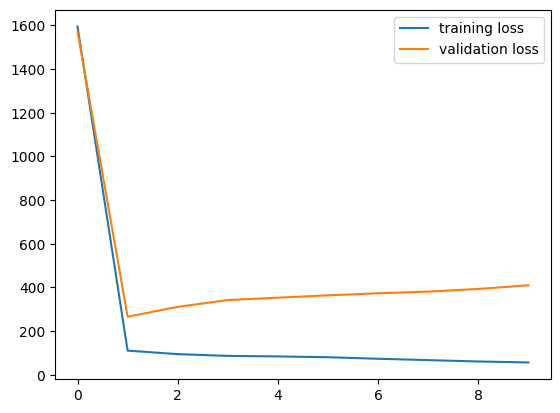

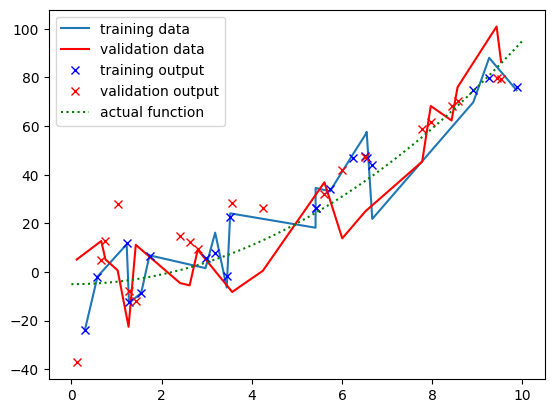

In [43]:
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

Indeed, we have fitted the training data fairly well, but the presence of noise in the data (both training and validation), we can see that the model fits the blue curve better than we want it to (closer to the blue curve than to the green dots). It can be argued that this is indeed undersampling as well as in the previous example - we don't have enough data to generalize well.

In order tro fix that, we should have a relatively simpler model and train it on much more data.

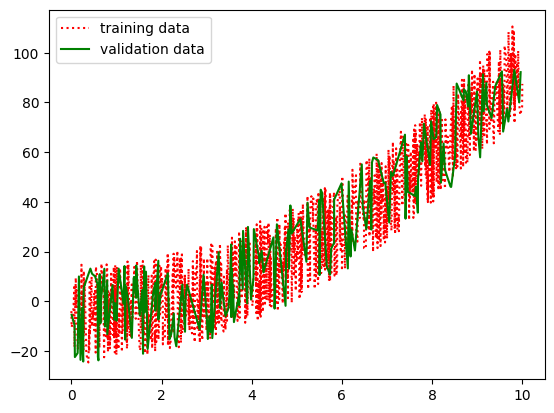

In [44]:
#let us createlarger training data
train_noisy_Xs=np.random.rand(1000)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(1000)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(200)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(200)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,"r:",label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"g-",label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((1000,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((1000,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((200,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((200,1)), dtype=torch.float32)

**Exercise 3** can you now use this data to train a simpler network (just one hidden layer with 50 neurons on this data? Does it solve the problem?

In [45]:

#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=50
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())


epoch:  0  loss:  1855.093017578125 validation loss:  1588.069580078125
epoch:  1000  loss:  135.9490509033203 validation loss:  141.95343017578125
epoch:  2000  loss:  134.7825164794922 validation loss:  140.30686950683594
epoch:  3000  loss:  134.5825653076172 validation loss:  140.43589782714844
epoch:  4000  loss:  134.37640380859375 validation loss:  140.48475646972656
epoch:  5000  loss:  134.27569580078125 validation loss:  140.66636657714844
epoch:  6000  loss:  134.1802215576172 validation loss:  140.91627502441406
epoch:  7000  loss:  134.08038330078125 validation loss:  141.30108642578125
epoch:  8000  loss:  133.99061584472656 validation loss:  141.45858764648438
epoch:  9000  loss:  133.92166137695312 validation loss:  141.6904754638672


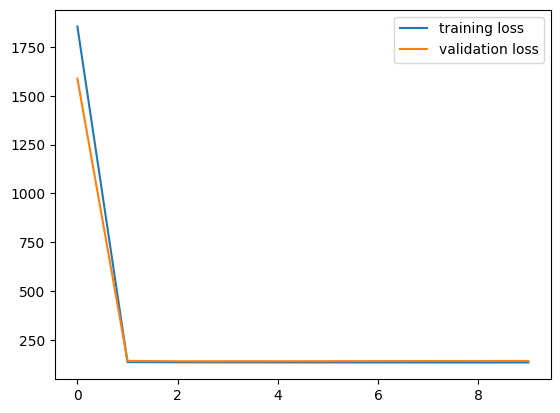

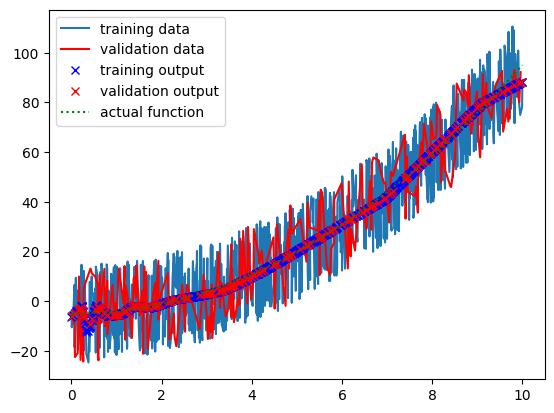

In [46]:
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

Even though the Loss value remains non-zero throughout the training, this is expected, as there is now noise in the training and validation data. Nonetheless, the fit to the data is relatively good.  

# Assignments for homework

As different groups at different Universities will use different scoring criteria, this might be completely optional for some of you and compulsory for some of you. It might or might not contribute to your grade. **Please consult with your instructors**

Homework assignments:

1.   Please take a look at the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). We did not use the dataset and dataloader API, but this should not stop you. Choose one of the examples from today's lecture and extend it so that it uses datasets and dataloaders
2.   One more thing that you might want to consider is re-writing the training loops to use the dataloaders and minibatches as in the [pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)
